In [17]:
import numpy as np
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import random 
from sklearn.preprocessing import StandardScaler

In [18]:
import xgboost as xgb

In [85]:
df=pd.read_csv("C:\\Users\\admin\\Downloads\\Cdk.csv")

In [86]:
df.shape

(162, 225)

In [87]:
columns_to_remove =['nAcid','nBase','WTPT-3','WTPT-4','WTPT-5','TopoPSA','MDEO-11','MDEO-12','MDEO-22','MDEN-11','MDEN-13','MDEN-12','MDEN-22','MDEN-23','MDEN-33','khs.sLi','khs.ssBe','khs.ssssBe','khs.ssBH','khs.sssB',
                   'khs.ssssB','khs.ddC','khs.sNH3','khs.sNH2','khs.ssNH2','khs.dNH','khs.ssNH','khs.aaNH','khs.tN','khs.sssNH','khs.dsN','khs.aaN','khs.sssN','khs.ddsN','khs.aasN','khs.ssssN','khs.sOH','khs.dO','khs.ssO',
                   'khs.aaO','khs.sF','khs.sSiH3','khs.ssSiH2','khs.sssSiH','khs.ssssSi','khs.sPH2','khs.ssPH','khs.sssP','khs.dsssP','khs.sssssP','khs.sSH','khs.dS','khs.ssS','khs.aaS','khs.dssS','khs.ddssS','khs.sCl','khs.sGeH3','khs.ssGeH2',
                    'khs.sssGeH','khs.ssssGe','khs.sAsH2','khs.ssAsH','khs.sssAs','khs.sssdAs','khs.sssssAs','khs.sSeH','khs.dSe','khs.ssSe','khs.aaSe','khs.dssSe','khs.ddssSe','khs.sBr','khs.sSnH3','khs.ssSnH2','khs.sssSnH','khs.ssssSn','khs.sI','khs.sPbH3','khs.ssPbH2',
                    'khs.sssPbH','khs.ssssPb','nHBDon','nHBAcc','molname','smiles','Name','Density']
columns_to_retain = list(set(df.columns)-set(columns_to_remove))
columns_to_retain
                    

['khs.aaaC',
 'nAromBond',
 'VC-6',
 'nAtomP',
 'nAtom',
 'WPATH',
 'khs.aaCH',
 'nAromBlocks',
 'AMR',
 'nRotB',
 'VP-4',
 'SP-0',
 'VP-6',
 'nRings8',
 'BCUTc-1h',
 'SC-4',
 'nRings5',
 'MDEC-11',
 'MLogP',
 'ALogp2',
 'ATSc3',
 'VABC',
 'SP-2',
 'ATSp5',
 'WTPT-2',
 'C4SP3',
 'ATSp1',
 'HybRatio',
 'apol',
 'ECCEN',
 'nB',
 'tpsaEfficiency',
 'nAtomLAC',
 'bpol',
 'BCUTp-1h',
 'MDEC-24',
 'khs.dsCH',
 'SCH-3',
 'SP-5',
 'ATSm2',
 'MDEC-34',
 'ATSm3',
 'ATSm5',
 'ATSc5',
 'nRingBlocks',
 'MDEC-23',
 'khs.sCH3',
 'SC-5',
 'BCUTw-1h',
 'ATSm4',
 'VC-5',
 'BCUTp-1l',
 'WTPT-1',
 'FMF',
 'MDEC-14',
 'SPC-6',
 'fragC',
 'nAromRings',
 'khs.dssC',
 'VCH-4',
 'VCH-3',
 'SPC-4',
 'SCH-7',
 'Kier1',
 'VPC-6',
 'SP-6',
 'ATSc2',
 'BCUTw-1l',
 'C2SP3',
 'SP-4',
 'PetitjeanNumber',
 'VCH-6',
 'nAtomLC',
 'ATSm1',
 'VP-1',
 'khs.dCH2',
 'naAromAtom',
 'SC-6',
 'khs.tCH',
 'khs.tsC',
 'SP-3',
 'Kier3',
 'C2SP1',
 'khs.sssCH',
 'nRings4',
 'SCH-5',
 'khs.ssCH2',
 'VAdjMat',
 'khs.ssssC',
 'VP-7',
 

In [88]:
f1=df.loc[:,columns_to_retain]
c=list(f1.head(1))
f1.shape

(162, 137)

In [89]:
x =np.nan_to_num(f1)
y = df.loc[:,'Density']
x1 =x
y1 = df.loc[:,'Density']

In [90]:
y

0      0.802
1      0.877
2      0.692
3      0.977
4      1.283
5      0.745
6      0.744
7      1.350
8      0.866
9      1.145
10     0.684
11     0.691
12     0.812
13     0.679
14     0.699
15     0.716
16     0.741
17     0.781
18     0.655
19     0.650
20     0.633
21     0.663
22     0.673
23     0.687
24     0.789
25     0.641
26     0.730
27     0.690
28     0.698
29     0.705
       ...  
132    0.788
133    0.781
134    0.862
135    1.006
136    0.971
137    1.310
138    0.679
139    0.665
140    0.776
141    0.522
142    1.307
143    1.063
144    0.688
145    0.664
146    0.662
147    0.779
148    0.806
149    0.854
150    0.882
151    0.809
152    0.726
153    0.726
154    0.711
155    0.735
156    0.720
157    0.741
158    0.744
159    0.755
160    0.777
161    0.900
Name: Density, Length: 162, dtype: float64

In [91]:
x,x_internal_test,y,y_internal_test = train_test_split(x,y,test_size=0.3,random_state=41)
x_train,x_external_test,y_train,y_external_test = train_test_split(x,y,test_size=0.3,random_state=41)

In [92]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_internal_test=sc.fit_transform(x_internal_test)
x_external_test=sc.fit_transform(x_external_test)
x=sc.fit(x).transform(x)
x1=sc.fit(x1).transform(x1)

In [93]:
x.shape

(113, 137)

In [100]:
nn=MLPRegressor(activation='tanh', solver='sgd', hidden_layer_sizes=(20,20,20),random_state=1)
nn.fit(x_train,y_train)

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [116]:
model = xgb.XGBRegressor()
model.fit(x_train,y_train)

[11:44:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\admin\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [101]:
yp=nn.predict(x_train)
yp1=nn.predict(x_internal_test)
yp2=nn.predict(x_external_test)
yp3=nn.predict(x1)

r21=r2_score(y_train,yp)
r22=r2_score(y_internal_test,yp1)
r23=r2_score(y_external_test,yp2)
r24=r2_score(y1,yp3)

rms = sqrt(mean_squared_error(y_train, yp))
rms1 = sqrt(mean_squared_error(y_internal_test,yp1))
rms2 = sqrt(mean_squared_error(y_external_test,yp2))
rms3 = sqrt(mean_squared_error(y1,yp3))

mea = mean_absolute_error(y_train,yp)
mea1 = mean_absolute_error(y_internal_test,yp1)
mea2 = mean_absolute_error(y_external_test,yp2)
mea3 = mean_absolute_error(y1,yp3)

In [117]:
yp=model.predict(x_train)
yp1=model.predict(x_internal_test)
yp2=model.predict(x_external_test)
yp3=model.predict(x1)

r21=r2_score(y_train,yp)
r22=r2_score(y_internal_test,yp1)
r23=r2_score(y_external_test,yp2)
r24=r2_score(y1,yp3)

rms = sqrt(mean_squared_error(y_train, yp))
rms1 = sqrt(mean_squared_error(y_internal_test,yp1))
rms2 = sqrt(mean_squared_error(y_external_test,yp2))
rms3 = sqrt(mean_squared_error(y1,yp3))

mea = mean_absolute_error(y_train,yp)
mea1 = mean_absolute_error(y_internal_test,yp1)
mea2 = mean_absolute_error(y_external_test,yp2)
mea3 = mean_absolute_error(y1,yp3)

In [32]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
yp=reg.predict(x_train)
yp1=reg.predict(x_internal_test)
yp2=reg.predict(x_external_test)
yp3=reg.predict(x1)

r21=r2_score(y_train,yp)
r22=r2_score(y_internal_test,yp1)
r23=r2_score(y_external_test,yp2)
r24=r2_score(y1,yp3)

rms = sqrt(mean_squared_error(y_train, yp))
rms1 = sqrt(mean_squared_error(y_internal_test,yp1))
rms2 = sqrt(mean_squared_error(y_external_test,yp2))
rms3 = sqrt(mean_squared_error(y1,yp3))

mea = mean_absolute_error(y_train,yp)
mea1 = mean_absolute_error(y_internal_test,yp1)
mea2 = mean_absolute_error(y_external_test,yp2)
mea3 = mean_absolute_error(y1,yp3)

In [110]:
from sklearn.ensemble import RandomForestRegressor
clf=RandomForestRegressor()
clf.fit(x_train,y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [111]:
yp=clf.predict(x_train)
yp1=clf.predict(x_internal_test)
yp2=clf.predict(x_external_test)
yp3=clf.predict(x1)

r21=r2_score(y_train,yp)
r22=r2_score(y_internal_test,yp1)
r23=r2_score(y_external_test,yp2)
r24=r2_score(y1,yp3)

rms = sqrt(mean_squared_error(y_train, yp))
rms1 = sqrt(mean_squared_error(y_internal_test,yp1))
rms2 = sqrt(mean_squared_error(y_external_test,yp2))
rms3 = sqrt(mean_squared_error(y1,yp3))

mea = mean_absolute_error(y_train,yp)
mea1 = mean_absolute_error(y_internal_test,yp1)
mea2 = mean_absolute_error(y_external_test,yp2)
mea3 = mean_absolute_error(y1,yp3)

In [105]:
from sklearn.ensemble import ExtraTreesRegressor
et=ExtraTreesRegressor()
et.fit(x_train,y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [106]:
yp=et.predict(x_train)
yp1=et.predict(x_internal_test)
yp2=et.predict(x_external_test)
yp3=et.predict(x1)

r21=r2_score(y_train,yp)
r22=r2_score(y_internal_test,yp1)
r23=r2_score(y_external_test,yp2)
r24=r2_score(y1,yp3)

rms = sqrt(mean_squared_error(y_train, yp))
rms1 = sqrt(mean_squared_error(y_internal_test,yp1))
rms2 = sqrt(mean_squared_error(y_external_test,yp2))
rms3 = sqrt(mean_squared_error(y1,yp3))

mea = mean_absolute_error(y_train,yp)
mea1 = mean_absolute_error(y_internal_test,yp1)
mea2 = mean_absolute_error(y_external_test,yp2)
mea3 = mean_absolute_error(y1,yp3)

In [118]:
print('r^2 test = ',r23)
print('r^2 overall = ',r24)

r^2 test =  0.7448368017419886
r^2 overall =  0.9008561134588218


In [119]:
print('RMSE (test) = ',rms2)
print('RMSE (overall) = ',rms3)

RMSE (test) =  0.08069543158956947
RMSE (overall) =  0.05585015151624722


In [120]:
print('Mean Absolute error (test) = ',mea2)
print('Mean Absolute error (overall) = ',mea3)

Mean Absolute error (test) =  0.048530203174142285
Mean Absolute error (overall) =  0.028169637058988038


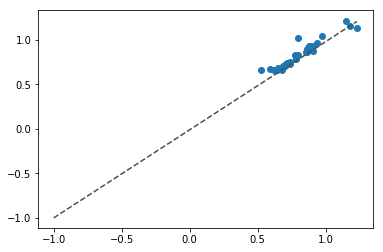

In [115]:
import matplotlib.pyplot as plt
plt.scatter(y_external_test,yp2)
plt.plot([-1,y_external_test.max()],[-1,yp2.max()],ls="--",c=".3")